# Encontrando APIs ocultas

Cuando una compañia desarrolla un sitio web muchas veces separa lo que se dice el _frontend_, que es la parte visible del sitio y la cual se ejecuta en tu navegador, del _backend_, la parte del sitio que realiza el computo mas pesado y se ejecuta en servidores/computadoras de la compañia.

Para comunicar el _backend_ con el _frontend_ una forma popular es desarrollar REST APIs, a veces estas son públicas pero a veces están ocultas y las utilizamos sin darnos cuenta cuando interactuamos con un sitio web.

Ejemplo de un sitio web y su API: http://numbersapi.com/

Hoy veremos como encontrarlas y utilizarlas para extraer datos de forma cómoda

## Ejemplo 1: Scrapeando un sitio de finanzas

Para este primer ejemplo veremos como encontrar [esta API]( https://www.bloomberg.com/markets2/api/history/BDIY%3AIND/PX_LAST?timeframe=5_YEAR&period=monthly&volumePeriod=monthly) en [este](https://www.bloomberg.com/quote/BDIY:IND) sitio web.

Luego veremos como utilizarla de 3 maneras:
1. Desde el navegador
2. Con cURL (Un programa de linea de comandos para transferir datos de internet)
3. Con python

### Método utilizando python
1. Entramos al sitio: https://www.bloomberg.com/quote/BDIY:IND
2. Vamos a _Inspeccionar_ ( ctrl+shift+i )
3. Vamos a la solapa _Network_ y seleccionamos XHR (El tipo de paquete que utilizan las APIs)
4. Recargamos el sitio y nos ponemos a revisar el _Response_ de cada paquete hasta encontrar cual contiene la información que buscamos
5. Copiamos el comando cURL necesario para consultarla
![](https://curl.trillworks.com/images/newscreenshot.png)
6. Utilizamos [curl.trillworks.com](curl.trillworks.com) para armar el request con código python y queda algo así

In [6]:
import requests

headers = {
    'authority': 'www.bloomberg.com',
    # user-agent: Datos del navegador que estoy usando
    'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.125 Safari/537.36',
    'dnt': '1',
    # accept: Indica el tipo de datos que esperamos
    # en este caso el "*" indica que puede ser cualquier cosa
    # pero a veces puede ser text/html o image/png por ejemplo
    'accept': '*/*',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-mode': 'cors',
    'sec-fetch-dest': 'empty',
    'referer': 'https://www.bloomberg.com/quote/BDIY:IND',
    'accept-language': 'es-US,es;q=0.9,en-US;q=0.8,en;q=0.7,es-419;q=0.6,ja;q=0.5',
    # cookie: Información sobre mi actividad en el sitio (Por ejemplo si inicie sesión previamente o no)
    'cookie': '_gcl_au=1.1.1627487790.1596132516; bdfpc=004.9046170925.1596132515875; agent_id=acb7a978-f3aa-4323-9d96-b1537ca8ea3b; session_id=ed2c986c-8c01-4e8c-8b76-fde60cefc81f; session_key=e9da446c0680815770aa81054708627ea56d0616; _ga=GA1.2.1803473370.1596132518; _pxvid=b00ae334-d28f-11ea-971a-0242ac120007; _rdt_uuid=1596132517790.63debb01-76b9-4c0f-ae8f-bff3b17bca8a; _lc2_fpi=b1166d620485--01eegejt7sn39qrh0xcxvrwyr7; _scid=b7e4309f-7ea2-4015-b136-54a3b3dbdaa1; __tbc=%7Bjzx%7Dt_3qvTkEkvt3AGEeiiNNgNAPX21QtaOI8L6VUZiQmluw55ur6FpWubvT2QrB33uKyaMK_mP7Ak9_QWQP0RqIveks1k28_T8VgiWTAqZqVF8tawtSPjwHunpqiD5tkAfnjylU0Z664w9lha1BgkmqDg; __pat=-14400000; _pxhd=d34367713bd40bfbfa0f0c3b396ee9865add545d8aabedafb462dcddff159a82:b00ae334-d28f-11ea-971a-0242ac120007; _parsely_visitor={%22id%22:%22pid=5d8302f5836276a941dc29d9fc26ab62%22%2C%22session_count%22:1%2C%22last_session_ts%22:1596132518892}; euconsent=BO0h5IxO2C4sjAKAiBENDQ-AAAAwd7_______9______9uz_Ov_v_f__33e8__9v_l_7_-___u_-23d4u_1vf99yfm1-7etr3tp_47ues2_Xurf_71__3z3_9pxP78k89r7335Ew_v-_v-b7BCPN_Y3v-8K96lA; bbAbVisits=1; trc_cookie_storage=taboola%2520global%253Auser-id%3D362f5396-a259-48c3-9a73-bff34416b1ad-tuct58f800d; _reg-csrf=s%3AG2-Cw2TCcKbTovNQUXHE0R3Q.oI3ssdO6XEec1ir75ZxY%2BvhOP%2BbmEeoEO6iUkeF6Ir4; _user-status=anonymous; _gid=GA1.2.1845756702.1597969166; _li_dcdm_c=.bloomberg.com; notice_behavior=implied|us; _sctr=1|1597892400000; bb_geo_info={"country":"AR","region":"US"}|1598573968258; _uetsid=ad51ba440d74d336095ced27797cf492; _uetvid=8944ed7b6896cf314ccc08f5fe11edf5; _dc_gtm_UA-11413116-1=1; _pxff_cc=U2FtZVNpdGU9TGF4Ow==; __pvi=%7B%22id%22%3A%22v-2020-08-20-21-21-40-625-o8wgY6fruSXEKJGH-5d65e486bf64678f389544ceae7df532%22%2C%22domain%22%3A%22.bloomberg.com%22%2C%22time%22%3A1597969300625%7D; _reg-csrf-token=KorOhnwG-P7-qaNZBaNp2_besko5kKxQOAic; xbc=%7Bjzx%7DlGnJasl3r1URKbEN4X7GUelbw1TtYkpfmpKjPK7DAtJa1T-JEu3y0KWpls-eZdQHstvhRDIno-Cc0RspwRO2aAcfWzFyNsAJwoNrRYPME51ODQyRw3sm3ifKD0TY23L5s2H8aE4iz6rv0635WMce5gt2SFG--5RL0JOfKrbPT2kaRuQadcc7dd_-TbbPmuXVr53YQEhlkk7QKI3fcoKz1h2a4ijvjvtThAOftklf3PX4BA5i_i_Hd1dTy5CJ-E27CjHqu7-XYYnQHYmS3oRhXRCAhml6aWgtKkPhD4facQ6PdAVNC1cjNEQWM0Uc8O7mKBzSlRAer6dWZXwOJRCqOY-7nVRjhDmBfGD384KnG7ijp5JGeNWzWkcygyuQIvaP; _px2=eyJ1IjoiNDg0ZTY1NDAtZTM0NC0xMWVhLTljNGMtNmYzN2JhZTk1Njg1IiwidiI6ImIwMGFlMzM0LWQyOGYtMTFlYS05NzFhLTAyNDJhYzEyMDAwNyIsInQiOjE1OTc5Njk2MDE4OTMsImgiOiJlMjRlYWJlNmFlMGMyNDY3N2Q1MThiMjRhNWQ0MTBiYTlmMmI0NWFlNTg0ZjUxOGNkMTEwYWZlZDEyZGQxNzk3In0=; _px3=a7ffefc848e81774ae4ee8e4c8d5115c49726d264f919facf3330a653f892003:rIi8rf3yyFq/ATbSwE7Eld18x0KgsLtCf+ZAyfOXcTA1MO5MQ+6QqkMVe3yAOMWkr8MC4VYyEGin7DfoUHJUmw==:1000:jmBECJJeZY3G9srtsHSZkkzbKrdx/eNK6RZJWJpZRarCwEayPo9QkohRopW3usA3CicS+IVMqpHuIk8fMqH4gKbmqh8+kYpXBTNLu+I3IDyJPM5zW+jk8B8rTvXoqVSGNO8n0ugoA9g3uS0rCQxgBbMMR5em/5Qq16xWIxc4plw=; _pxde=a4b9ece7e34059aac8b650d138e12c1fb6c89b0fbc4e73c0c04e8bbece83666d:eyJ0aW1lc3RhbXAiOjE1OTc5NjkzMTI3ODYsImZfa2IiOjAsImlwY19pZCI6W119; _gat_UA-11413116-1=1',
}

params = (
    ('timeframe', '5_YEAR'),
    ('period', 'monthly'),
    ('volumePeriod', 'monthly'),
)

response = requests.get('https://www.bloomberg.com/markets2/api/history/BDIY%3AIND/PX_LAST', headers=headers, params=params)

# Si los datos son provistos en formato JSON podemos utilizar el metodo .json() para acceder a ellos.
response.json()

[{'ticker': 'BDIY:IND',
  'previousClosingPriceOneTradingDayAgo': None,
  'openPrice': None,
  'range': None,
  'price': [{'dateTime': '2015-08-31', 'value': 903},
   {'dateTime': '2015-09-30', 'value': 900},
   {'dateTime': '2015-10-30', 'value': 721},
   {'dateTime': '2015-11-30', 'value': 584},
   {'dateTime': '2015-12-31', 'value': 478},
   {'dateTime': '2016-01-29', 'value': 317},
   {'dateTime': '2016-02-29', 'value': 329},
   {'dateTime': '2016-03-31', 'value': 429},
   {'dateTime': '2016-04-29', 'value': 703},
   {'dateTime': '2016-05-31', 'value': 612},
   {'dateTime': '2016-06-30', 'value': 660},
   {'dateTime': '2016-07-29', 'value': 656},
   {'dateTime': '2016-08-31', 'value': 711},
   {'dateTime': '2016-09-30', 'value': 875},
   {'dateTime': '2016-10-31', 'value': 857},
   {'dateTime': '2016-11-30', 'value': 1204},
   {'dateTime': '2016-12-30', 'value': 961},
   {'dateTime': '2017-01-31', 'value': 800},
   {'dateTime': '2017-02-28', 'value': 859},
   {'dateTime': '2017-03-

## Mejorando el código

Analizando la API se puede ver que tiene ciertos parámetros modificables. Por ejemplo el código identificador de la empresa, el rango de tiempo de los datos y la frecuencia que nos interesa.

Podemos poner todo esto dentro de una función que extraiga los precios de una compañia dada para que sea mas facil de usar y no necesitemos repetir el código cada vez que bajemos datos de una compañia nueva.

In [35]:
def company_prices(company_code, timeframe="5_YEAR",period='monthly', volume_period = 'monthly'):
    params = (
        ('timeframe', timeframe),
        ('period', period),
        ('volumePeriod', volume_period),
    )

    headers = {
        'authority': 'www.bloomberg.com',
        'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.125 Safari/537.36',
        'dnt': '1',
        'accept': '*/*',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-mode': 'cors',
        'sec-fetch-dest': 'empty',
        'referer': 'https://www.bloomberg.com/quote/BDIY:IND',
        'accept-language': 'es-US,es;q=0.9,en-US;q=0.8,en;q=0.7,es-419;q=0.6,ja;q=0.5',
    }

    response = requests.get(f'https://www.bloomberg.com/markets2/api/history/{company_code}/PX_LAST', headers=headers, params=params)
    stock_data = response.json()
    prices = # COMPLETAR
    return prices

prices = company_prices("MELI:LN") # MercadoLibre
prices

[{'dateTime': '2018-01-31', 'value': 386.37},
 {'dateTime': '2018-02-28', 'value': 375.44},
 {'dateTime': '2018-03-30', 'value': 341.22},
 {'dateTime': '2018-04-30', 'value': 341.17},
 {'dateTime': '2018-05-31', 'value': 290.6}]

In [36]:
import plotly.express as px

y = [x['value'] for x in prices]
x = [x['dateTime'] for x in prices]

fig = px.line(x=x, y=y, labels={'x':'x', 'y':"asd"})
fig.show()

## Ejercicio de Twitter

Armen una lista con los strings de los primeros 20 tweets de pyconar. Luego utilicen la función provista para calcular la frecuencia de los hashtags.

Link que deberán inspeccionar: https://twitter.com/pyconar

In [32]:
# 1. Encontrar API oculta que provee los datos de los tweets
# 2. Descargar datos utilizando curl.trillworks.com y convertirlos a json
# 3 Armar una lista vacia llamada "tweets"
# 4 Identificar en que parte del diccionario se encuentra el atributo "full_text"
# 5 Iterar por cada tweet y extraer el "full_text" y agregarlo a la lista "tweets"

#### Usemos lo hecho para calcular las frecuencia de cada hashtag

In [17]:
import pandas as pd

# funcion para calcular hashtags
def get_hashtags(texts):
    joined_texts = "|".join(texts)
    joined_texts = "".join([c if c.isalpha() or c == "#" else " " for c in joined_texts])
    hashtags = [tag.strip("#") for tag in joined_texts.split() if tag.startswith("#") and len(tag) > 1]
    return hashtags

hashtags = get_hashtags(tweets)

data = pd.DataFrame(hashtags,columns=["hashtags"])
data.head()

,hashtags
0,sinverguenza
1,mascotasreaccionan
2,perritoshaciendocosas
3,cachorritos
4,perritoschallenge


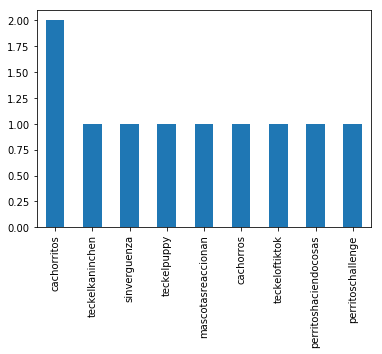

In [62]:
data["hashtags"].value_counts().plot(kind='bar')

## Para seguir jugando

[aiva.ai](https://aiva.ai) también tiene una API interna que pueden intentar encontrar (Hay que registrarse).

## Herramientas útiles
- [curl2python](https://curl.trillworks.com/)
- [Visualizador de JSONs](http://jsonviewer.stack.hu/)

## Recursos útiles
- [Tutorial de Indian Pythonista sobre APIs ocultas](https://www.youtube.com/watch?v=twuhocLtGCg)